In [1]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


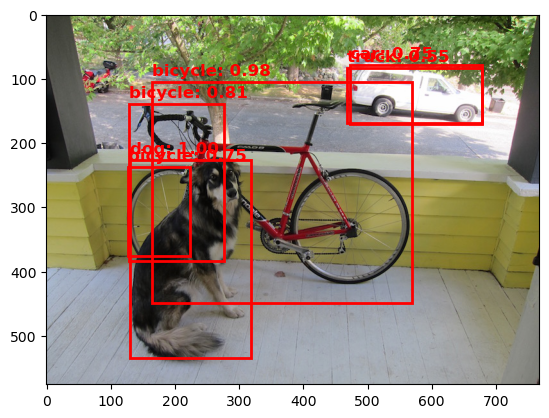

In [4]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

# Load COCO labels (91 classes)
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load an image and preprocess
img = Image.open('obj.jpg')
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
img_tensor = transform(img)

# Perform detection
with torch.no_grad():
    predictions = model([img_tensor])

# Get the predictions (bounding boxes, labels, scores)
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# Visualize the image with bounding boxes and labels
def plot_boxes(img, boxes, labels, scores, threshold=0.5):
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    for i, box in enumerate(boxes):
        if scores[i] > threshold:
            x_min, y_min, x_max, y_max = box
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color='red', linewidth=2)
            ax.add_patch(rect)
            
            # Get the label name
            label_name = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            
            # Add label text above the bounding box
            plt.text(x_min, y_min - 10, f'{label_name}: {scores[i]:.2f}', color='red', fontsize=12, weight='bold')

    plt.show()

plot_boxes(img, boxes, labels, scores)
